In [46]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from numpy import nan

In [47]:
dataset = pd.read_csv("data 4 ver1.csv")
dataset

,CGPA,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,8.0,NaN,no,excellent,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,Developer
1,8.8,yes,no,poor,yes,no,NaN,no,no,no,no,yes,NaN,no,no,no,yes,no,no,ML engineer
2,7.9,no,no,poor,no,yes,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,Management
3,8.0,yes,no,medium,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,yes,Developer
4,6.4,no,no,poor,no,yes,yes,no,yes,no,no,no,yes,no,no,no,no,yes,no,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8.5,yes,yes,excellent,yes,no,yes,no,no,no,yes,yes,yes,no,no,no,yes,no,no,Data Analysis
512,8.1,no,NaN,poor,yes,yes,yes,no,yes,no,yes,yes,yes,no,no,no,no,no,no,Computer Analyst
513,8.0,yes,no,poor,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,Developer
514,6.4,no,no,excellent,no,yes,yes,no,yes,NaN,no,no,yes,no,no,no,no,yes,yes,Marketing


In [48]:
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(488, 20)


In [49]:
df = dataset
df = df.drop(['CGPA'],axis=1)
df.describe()

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
count,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488
unique,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,10
top,no,no,excellent,no,no,yes,no,yes,no,no,no,yes,no,no,no,no,no,no,Developer
freq,260,379,169,247,306,313,338,275,464,357,371,410,348,363,429,400,323,342,127


In [50]:
data = df.iloc[:,:-1].values
label = df.iloc[:,-1].values
data.shape

(488, 18)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

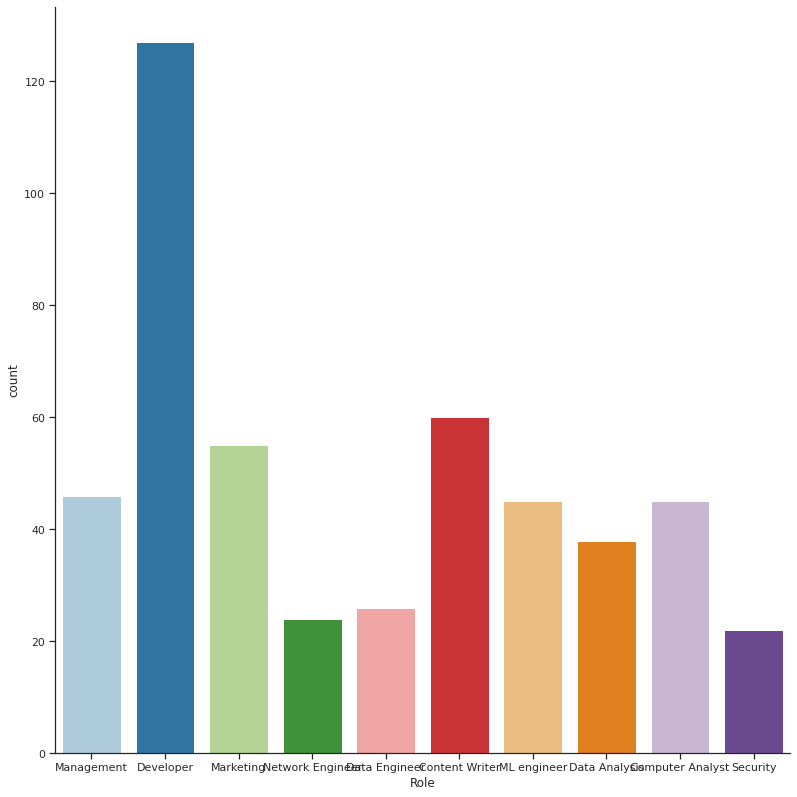

In [52]:
sns.catplot(x="Role", kind="count", palette="Paired",height=11, data=df)

# Encoding Data

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [54]:
labelencoder = LabelEncoder()

In [55]:
for i in range(0,18):
    data[:,i] = labelencoder.fit_transform(data[:,i])
data
integer_encoded = data[:,2]
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
a = data[:,0:2]
b = onehot_encoded
c = data[:,3:]
data1 = np.concatenate((a, b), 1)
data1 = np.concatenate((data1, c), 1)
data1

array([[0, 0, 0.0, ..., 0, 0, 0],
       [1, 0, 0.0, ..., 0, 0, 1],
       [0, 0, 0.0, ..., 0, 1, 0],
       ...,
       [1, 0, 0.0, ..., 0, 1, 0],
       [1, 1, 1.0, ..., 1, 0, 0],
       [1, 0, 0.0, ..., 0, 0, 0]], dtype=object)

In [56]:
label = labelencoder.fit_transform(label)
label

array([6, 4, 7, 8, 3, 8, 1, 1, 5, 4, 4, 3, 8, 4, 4, 2, 4, 4, 4, 7, 2, 4,
       5, 1, 5, 7, 1, 4, 4, 2, 6, 0, 9, 4, 6, 7, 9, 3, 2, 8, 0, 5, 4, 7,
       6, 9, 8, 1, 5, 6, 1, 0, 8, 9, 1, 3, 4, 4, 4, 2, 6, 3, 4, 5, 0, 3,
       4, 7, 1, 8, 7, 4, 9, 3, 1, 0, 6, 5, 9, 5, 1, 5, 6, 1, 0, 7, 1, 1,
       0, 9, 4, 3, 6, 0, 4, 7, 6, 0, 1, 1, 8, 4, 2, 6, 3, 4, 5, 0, 5, 7,
       1, 4, 6, 4, 7, 8, 4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 9, 7, 1, 1, 4, 4,
       7, 8, 3, 1, 0, 6, 7, 1, 4, 8, 4, 8, 4, 9, 7, 1, 6, 6, 0, 4, 7, 6,
       2, 0, 4, 8, 5, 1, 5, 3, 2, 5, 7, 1, 4, 1, 4, 7, 6, 2, 0, 4, 9, 5,
       1, 5, 6, 8, 4, 5, 0, 3, 4, 9, 7, 1, 4, 0, 5, 4, 7, 6, 2, 7, 6, 2,
       0, 4, 8, 5, 1, 5, 6, 1, 4, 5, 0, 0, 4, 7, 6, 2, 0, 4, 9, 5, 1, 5,
       8, 2, 3, 4, 9, 2, 8, 4, 5, 0, 0, 5, 7, 1, 4, 2, 6, 4, 8, 4, 4, 7,
       4, 4, 2, 4, 6, 4, 0, 5, 4, 7, 6, 2, 0, 4, 5, 7, 1, 4, 5, 7, 1, 4,
       6, 4, 7, 4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 3, 4, 7, 4, 4, 2, 4, 6, 5,
       7, 7, 1, 4, 6, 4, 3, 2, 3, 4, 4, 9, 3, 4, 7,

In [57]:
from sklearn.preprocessing import Normalizer

In [58]:
list(df.columns)

['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills',
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?',
 'Role']

# Adding Headers

In [59]:
X1 = pd.DataFrame(data1,columns=['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills(exelent)',
 'reading and writing skills(medium)',
 'reading and writing skills(poor)',                               
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security ',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?'])

In [60]:
print(X1.shape)
X1.head(80)

(488, 20)


,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
76,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
77,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1
78,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0


In [61]:
y=pd.DataFrame(label,columns=["Suggested Job Role"])
y.head()

,Suggested Job Role
0,6
1,4
2,7
3,8
4,3


# Decision Tree Using Gini

In [62]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state= 14) 
X1

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
484,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1
485,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
486,1,1,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [65]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "gini")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.3770491803278688
2            0.5
3            0.5409836065573771
4            0.6721311475409836
5            0.8032786885245902
6            0.8278688524590164
7            0.8442622950819673
8            0.8278688524590164
9            0.8524590163934426
10            0.860655737704918


In [66]:
clf = tree.DecisionTreeClassifier(max_depth = 7,criterion = "gini")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [67]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("Accuracy = ",accuracy)

confusion matrix
[[10  0  0  0  0  1  0  0  0  0]
 [ 0  6  0  0  4  0  0  0  0  0]
 [ 0  0 10  0  0  0  1  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  1  1 38  0  0  1  1  0]
 [ 0  0  0  1  1  7  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  1  0]
 [ 0  0  0  0  2  0  1  9  0  0]
 [ 1  0  1  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  7]]
Accuracy =  0.8442622950819673


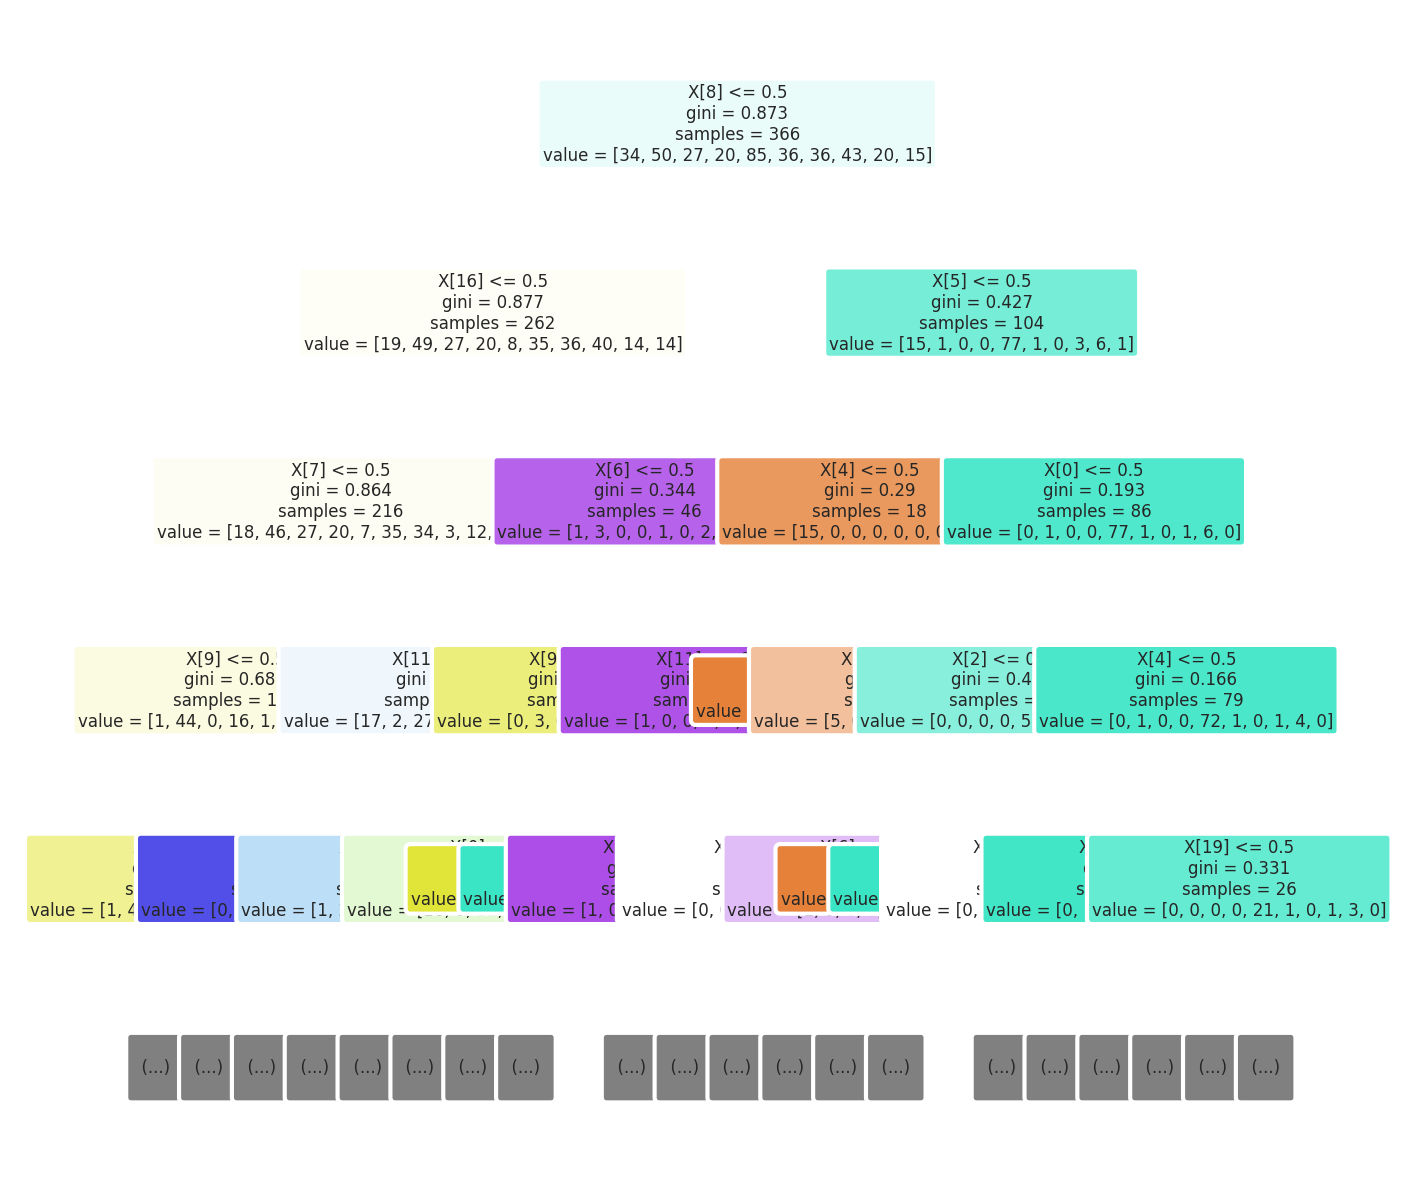

In [68]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,filled=True,fontsize=4,max_depth=4,rounded=True);
# fig.savefig('imagename.png')

# Decision tree with entropy

In [69]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "entropy")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.3770491803278688
2            0.5163934426229508
3            0.6885245901639344
4            0.7868852459016393
5            0.8442622950819673
6            0.8852459016393442
7            0.8688524590163934
8            0.8524590163934426
9            0.8442622950819673
10            0.8442622950819673


In [70]:
clf2 = tree.DecisionTreeClassifier(max_depth = 5,criterion = "entropy")
clf2 = clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [71]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("Accuracy = ",accuracy)

confusion matrix
[[ 9  0  0  0  0  1  0  1  0  0]
 [ 0  6  3  0  1  0  0  0  0  0]
 [ 0  0 10  0  1  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  1  1 39  0  0  1  0  0]
 [ 0  0  0  1  1  7  0  0  0  0]
 [ 0  0  0  0  1  0  9  0  0  0]
 [ 0  0  0  0  0  0  1 11  0  0]
 [ 1  0  1  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  6]]
Accuracy =  0.8442622950819673


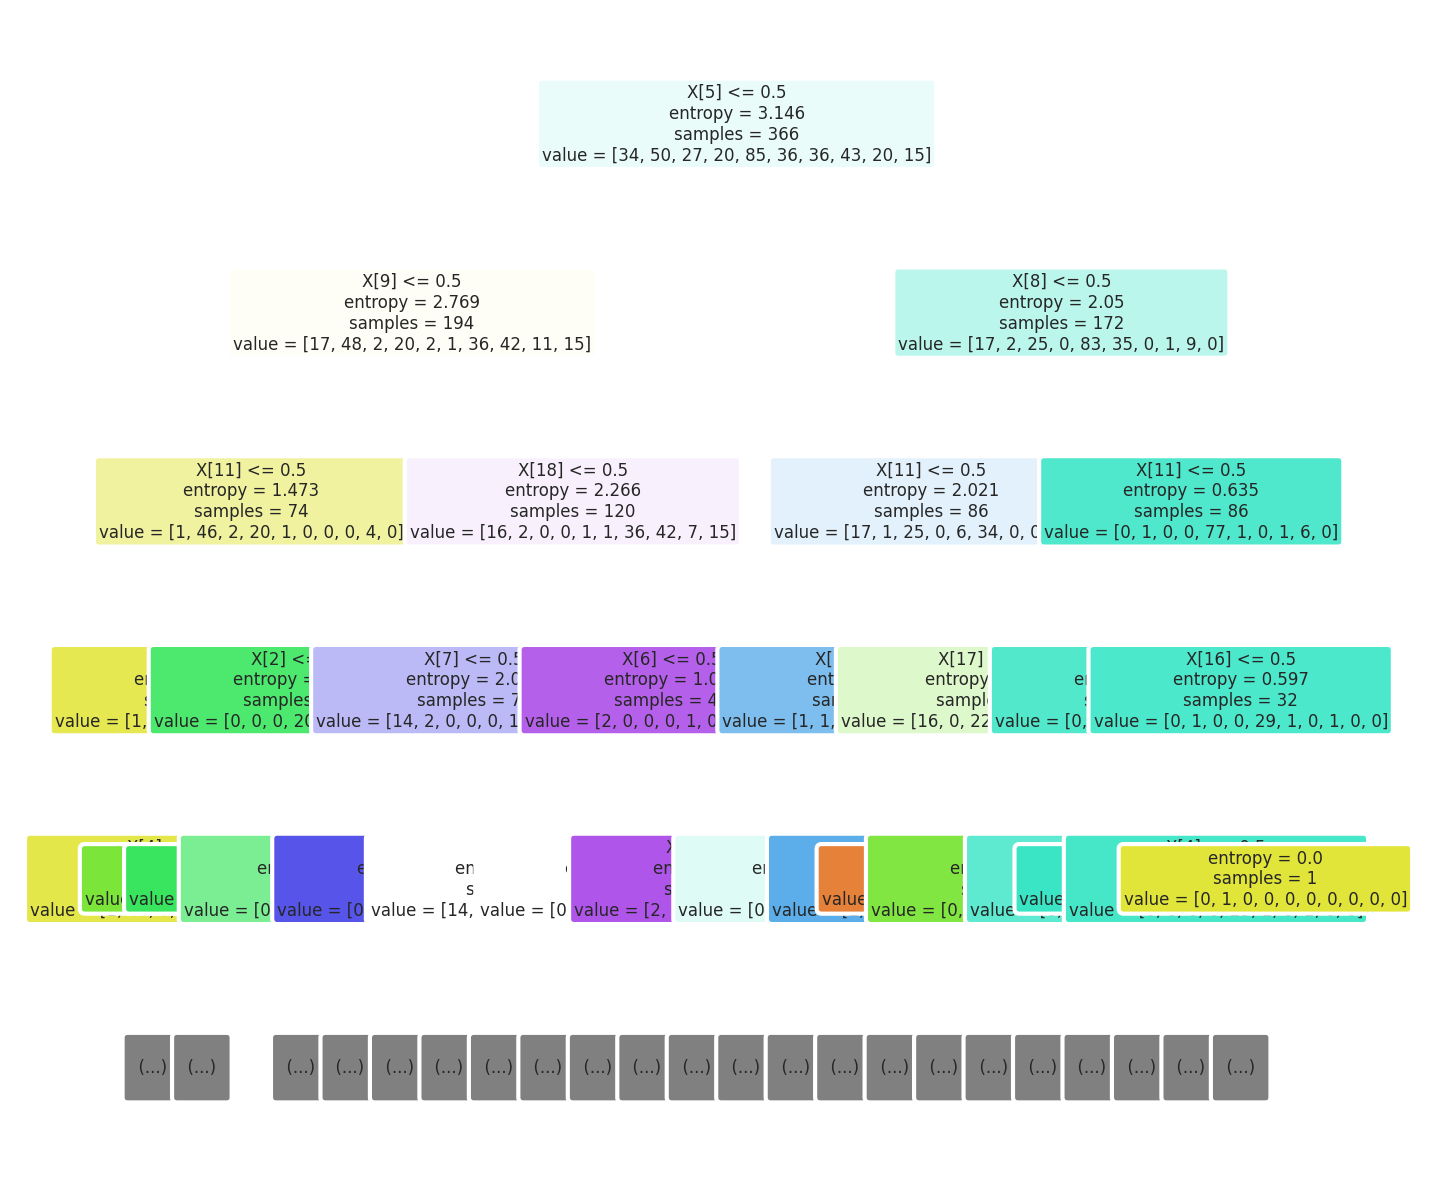

In [72]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf2,filled=True,fontsize=4,max_depth=4,rounded=True);
# fig.savefig('imagename.png')

# SVM (Support vector machine) classifier

In [73]:
from sklearn import svm

In [74]:
clf = svm.SVC()
clf.fit(X_train, y_train)

/home/primanshu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [75]:
svm_y_pred = clf.predict(X_test)

In [76]:
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)

In [77]:
print("confusion matrix")
print(svm_cm)
print("Accuracy = ",svm_accuracy*100)

confusion matrix
[[10  0  0  0  0  1  0  0  0  0]
 [ 0  7  0  0  1  0  0  0  2  0]
 [ 0  0 10  0  0  0  1  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  1  1 39  0  0  1  0  0]
 [ 0  0  0  1  0  8  0  0  0  0]
 [ 0  0  0  0  1  0  9  0  0  0]
 [ 0  0  0  0  0  0  1 11  0  0]
 [ 1  0  1  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7]]
Accuracy =  87.70491803278688
